# GWR global moran I and GWR result 

# 2021 global moran's I index result 

In [1]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sms
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import re
import seaborn as sns


from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn                   # Graphics
import geopandas                 # Spatial data manipulation
import pandas                    # Tabular data manipulation
import rioxarray                 # Surface data manipulation
import xarray                    # Surface data manipulation
from pysal.explore import esda   # Exploratory Spatial analytics
from pysal.lib import weights    # Spatial weights

import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

/Users/zhangyuhua/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/Users/zhangyuhua/opt/anaconda3/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [2]:
moran_21 = gpd.read_file('data/moran_2021.shp')


In [3]:
# data cleaning 
moran_21['average'] = moran_21['average'].astype(float)

moran_21.drop('long', axis=1,inplace =True)
moran_21.drop('lat', axis=1,inplace =True)

In [4]:
# bandwidth，
w = weights.distance.KNN.from_dataframe(moran_21, k=8)
w.transform = 'R'
moran_2021 = esda.moran.Moran(moran_21['average'], w)

## Results for the global moran's I instage II 

In [5]:
moran_2021.I

0.2686771131511227

In [6]:
moran_2021.EI

-0.001272264631043257

In [7]:
moran_2021.z_norm

16.220606749204745

In [8]:
moran_2021.p_norm

0.0

In [9]:
 moran_2021.VI_norm

0.00027696855850098824

# GWR regression model

In [10]:
# read data 
gwr21 = pd.read_excel('data/gwr_2021.xlsx','Sheet1')
gwr21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   InputID                  787 non-null    object 
 1   long                     787 non-null    float64
 2   lat                      787 non-null    float64
 3   area                     787 non-null    object 
 4   neighbourhood            787 non-null    object 
 5   loop                     787 non-null    object 
 6   Distance_subway          787 non-null    float64
 7   average                  787 non-null    int64  
 8   Unnamed: 8               0 non-null      float64
 9   average_log              787 non-null    float64
 10  total_construction_area  787 non-null    int64  
 11  total_dwellings          787 non-null    int64  
 12  green_space              787 non-null    int64  
 13  construction_land_ratio  787 non-null    float64
 14  parking                  7

In [11]:
gwr21['average_household_area'].describe()

count     787.000000
mean       99.679038
std        98.486606
min        26.799982
25%        46.097085
50%        86.407183
75%       112.145522
max      1841.130165
Name: average_household_area, dtype: float64

# histogram

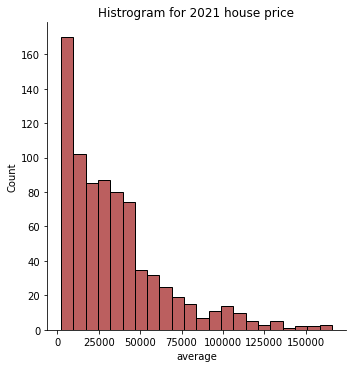

In [12]:
sns.displot(gwr21['average'], color = 'brown')
plt.title('Histrogram for 2021 house price')
plt.savefig('price_orginial.png')

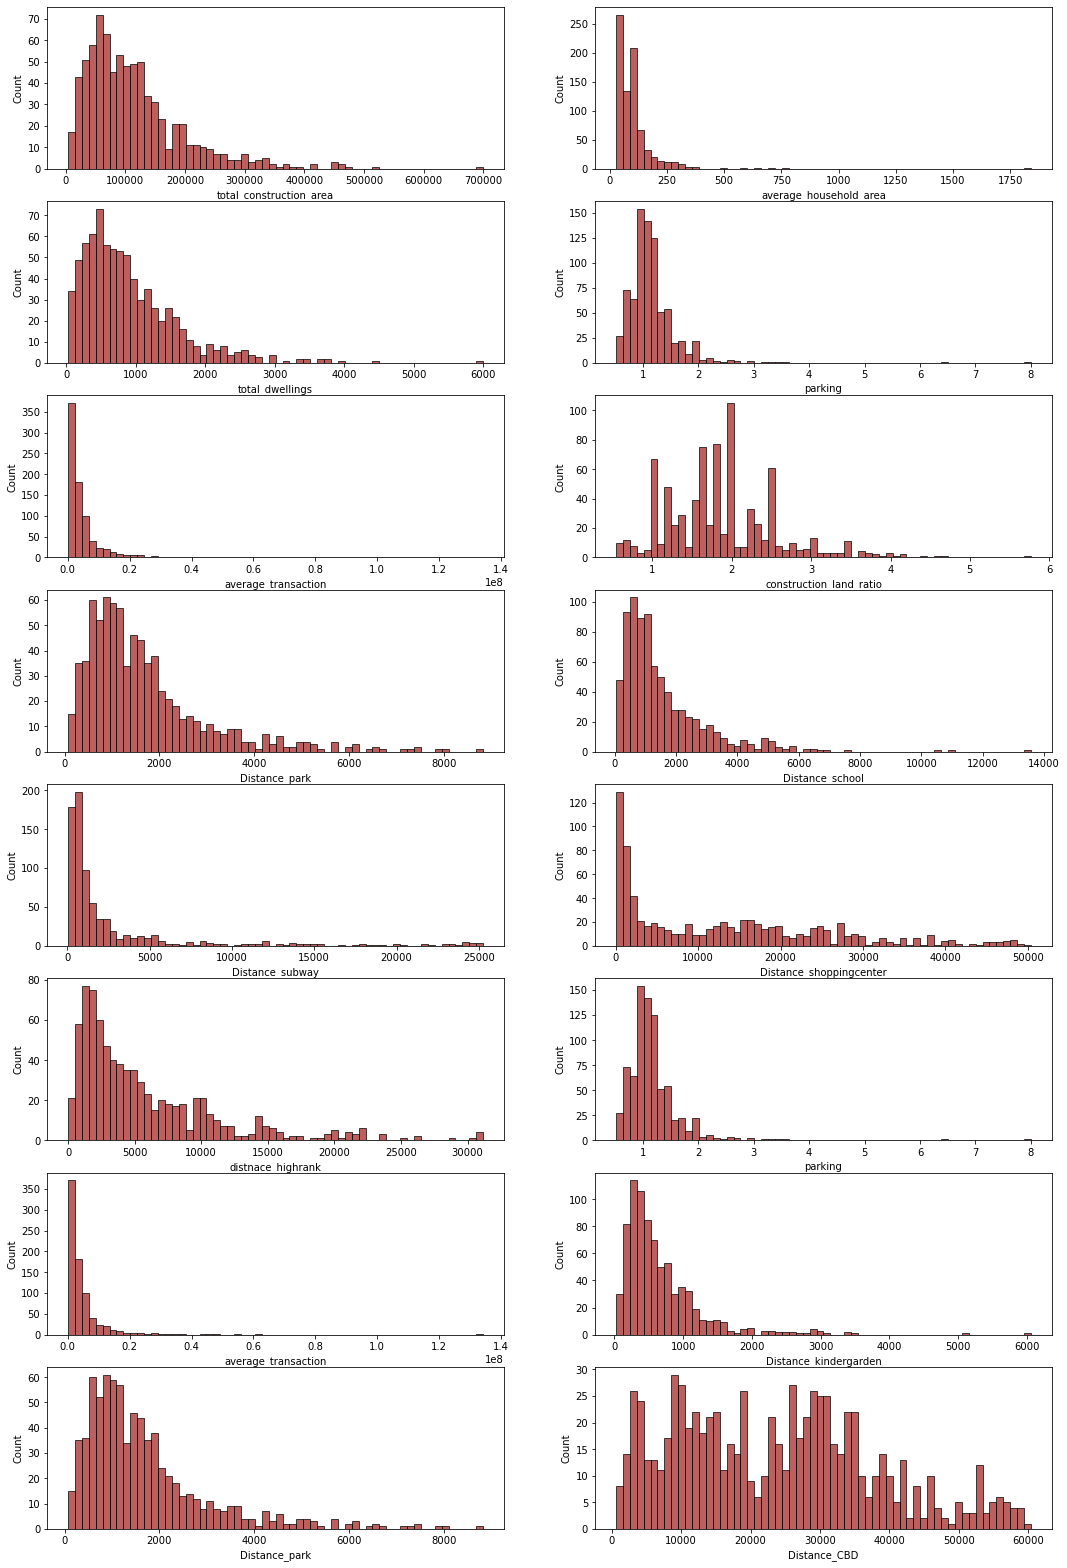

In [13]:
# plot nine variables in total
fig, axes = plt.subplots(8,2)
fig.set_size_inches(18,28)
sns.histplot(gwr21['total_construction_area'], bins = 60, ax=axes[0,0],color = 'brown')
sns.histplot(gwr21['average_household_area'], bins = 60, ax=axes[0,1],color = 'brown')
sns.histplot(gwr21['total_dwellings'], bins = 60, ax=axes[1,0],color = 'brown')
sns.histplot(gwr21['parking'], bins = 60, ax=axes[1,1],color = 'brown')
sns.histplot(gwr21['average_transaction'], bins = 60, ax=axes[2,0],color = 'brown')
sns.histplot(gwr21['construction_land_ratio'], bins = 60, ax=axes[2,1],color = 'brown')
sns.histplot(gwr21['Distance_park'], bins = 60, ax=axes[3,0],color = 'brown')
sns.histplot(gwr21['Distance_school'], bins = 60, ax=axes[3,1],color = 'brown')
sns.histplot(gwr21['Distance_subway'], bins = 60, ax=axes[4,0],color = 'brown')
sns.histplot(gwr21['Distance_shoppingcenter'], bins = 60, ax=axes[4,1],color = 'brown')
sns.histplot(gwr21['distnace_highrank'], bins = 60, ax=axes[5,0],color = 'brown')
sns.histplot(gwr21['parking'], bins = 60, ax=axes[5,1],color = 'brown')
sns.histplot(gwr21['average_transaction'], bins = 60, ax=axes[6,0],color = 'brown')
sns.histplot(gwr21['Distance_kindergarden'], bins = 60, ax=axes[6,1],color = 'brown')
sns.histplot(gwr21['Distance_park'], bins = 60, ax=axes[7,0],color = 'brown')
sns.histplot(gwr21['Distance_CBD'], bins = 60, ax=axes[7,1],color = 'brown')
plt.savefig('variable.png')

# VIF to drop the highly correlated variables 

In [14]:
gwr21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   InputID                  787 non-null    object 
 1   long                     787 non-null    float64
 2   lat                      787 non-null    float64
 3   area                     787 non-null    object 
 4   neighbourhood            787 non-null    object 
 5   loop                     787 non-null    object 
 6   Distance_subway          787 non-null    float64
 7   average                  787 non-null    int64  
 8   Unnamed: 8               0 non-null      float64
 9   average_log              787 non-null    float64
 10  total_construction_area  787 non-null    int64  
 11  total_dwellings          787 non-null    int64  
 12  green_space              787 non-null    int64  
 13  construction_land_ratio  787 non-null    float64
 14  parking                  7

In [15]:
# the columns that are dropped are the y-variabels, nans and the columns that will cause 'matrix isingular problem'
# and currently no solution for this issue, so these variables are not mentioned 
df = gwr21
df = df.drop(df.columns[[0, 1, 2,3,4,5,6,7,8,9,10,12,19,22,24,28,30,25]], axis=1)  # df.columns is zero-based pd.Index

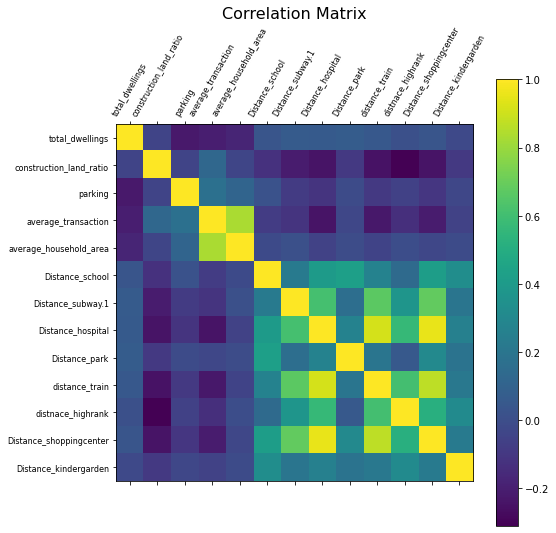

In [16]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=60)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('VIF.png')

In [17]:
# drop vif
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df



In [18]:
vi_g = pd.DataFrame(df)
vif = drop_column_using_vif_(vi_g)

Max VIF: 21.57173503337404
Dropping: Distance_hospital
Max VIF: 5.375778434719991


# Fit gwr 

In [19]:
# 处理数据
Distance_kindergarden = gwr21['Distance_kindergarden'].values.reshape((-1,1))
total_construction_area = gwr21['total_construction_area'].values.reshape((-1,1))
average_household_area = gwr21['average_household_area'].values.reshape((-1,1))
total_dwellings = gwr21['total_dwellings'].values.reshape((-1,1))
parking = gwr21['parking'].values.reshape((-1,1))
average_transaction = gwr21['average_transaction'].values.reshape((-1,1))
construction_land_ratio = gwr21['construction_land_ratio'].values.reshape((-1,1))
Distance_shopping = gwr21['Distance_shop'].values.reshape((-1,1))
Distance_hospital = gwr21['Distance_hospital'].values.reshape((-1,1))
Distance_park = gwr21['Distance_park'].values.reshape((-1,1))
Distance_school = gwr21['Distance_school'].values.reshape((-1,1))
green_space = gwr21['green_space'].values.reshape((-1,1))
Distance_subway = gwr21['Distance_subway'].values.reshape((-1,1))
green_space = gwr21['green_space'].values.reshape((-1,1))
distance_train = gwr21['Distance_shop'].values.reshape((-1,1))
distnace_highrank = gwr21['distnace_highrank'].values.reshape((-1,1))
Distance_shoppingcenter = gwr21['Distance_shoppingcenter'].values.reshape((-1,1))
Distance_bus = gwr21['Distance_bus'].values.reshape((-1,1))


x，y and coordinates 

In [20]:
u = gwr21['long']
v = gwr21['lat']
g_coords = list(zip(u,v))


In [21]:
g_y = gwr21['average_log'].values.reshape((-1,1))
g_y.shape

(787, 1)

## all the x-variables that used 

In [22]:
#Distance_bus,
g_x = np.hstack([distnace_highrank,distance_train,
                 Distance_school,Distance_subway,
                 Distance_shoppingcenter,
                 Distance_park,average_household_area,Distance_kindergarden,
                construction_land_ratio,
                 parking,total_dwellings,average_transaction])

In [23]:
g_x= (g_x - g_x.mean(axis=0)) / g_x.std(axis=0)

g_y = g_y.reshape((-1,1))
g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [24]:
sel = Sel_BW(g_coords, g_y,g_x)


In [25]:
bw = sel.search()
print('bw:', bw)

bw: 308.0


In [26]:
gwr = GWR(g_coords, g_y, g_x, bw)

gwr_results = gwr.fit()

# the GWR and OLS result 

In [27]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 787
Number of covariates:                                                    13

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            499.352
Log-likelihood:                                                    -937.695
AIC:                                                               1901.390
AICc:                                                              1903.934
BIC:                                                              -4661.857
R2:                                                                   0.365
Adj. R2:                                                              0.356

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

significant variable: distance_train,Distance_subway,Distance_shoppingcenter,Distance_park,construction_land_ratio,total_dwellings,average_transaction，


### From the result collect the variation of R2 and coefficients 

In [28]:
moran_21['gwr_R'] = gwr_results.localR2
moran_21['gwr_train'] = gwr_results.params[:,2]
moran_21['gwr_subway'] = gwr_results.params[:,4]

moran_21['gwr_shoppingcentre'] = gwr_results.params[:,5]
moran_21['gwr_park'] = gwr_results.params[:,7]


In [29]:
gwr_min = moran_21['gwr_R'].min()
gwr_max = moran_21['gwr_R'].max()

In [30]:
gwr_min

0.43491349900302045

In [31]:
gwr_max

0.5661532861606425

In [32]:
# preparing the coefficients plot for the significant variables 
# for better illustration, this is achieved in QGIS

In [33]:
moran_21.to_file('GWR_result.shp')

The above result is used to plot figure in QGIS, in which we attach the figure in the github,too. The below is a example of such figure.

## Example GWR map (Not the final one )- QGIS can produce better visualisation 

In [34]:
# example of R2 map 

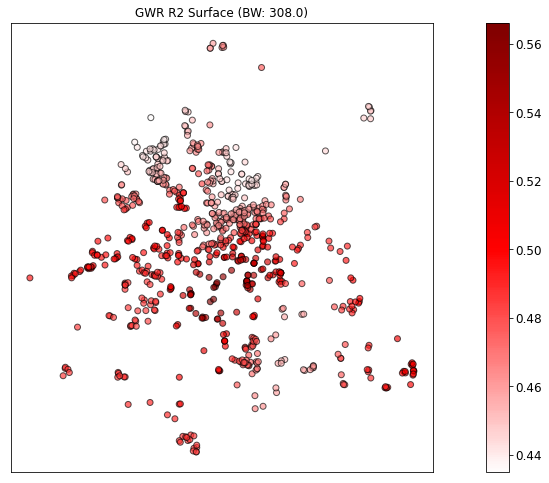

In [35]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR R2 Surface (BW: ' + str(bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = moran_21['gwr_R'].min()
gwr_max = moran_21['gwr_R'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
moran_21.plot('gwr_R', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})

#Set figure options and plot 
fig.tight_layout()    
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
['gwr_train']

['gwr_train']

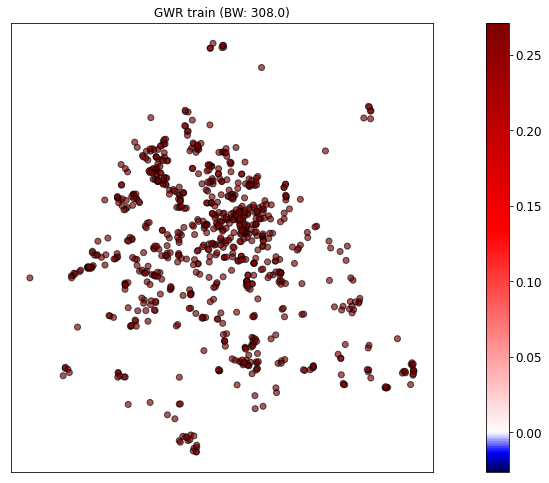

In [37]:
#Prep plot and add axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.set_title('GWR train (BW: ' + str(bw) +')', fontsize=12)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the combined dataset
gwr_min = moran_21['gwr_train'].min()
gwr_max = moran_21['gwr_train'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
moran_21.plot('gwr_R', cmap=sm.cmap, ax=ax, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})

#Set figure options and plot 
fig.tight_layout()    
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=12) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()